In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Read data from CSV file
df = pd.read_csv("multi-variable-data.csv", header=None, names=["size","Beds No.","price"])

# Display the first 10 rows of the dataframe
df.head(10)

,size,Beds No.,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [24]:
# Display summary statistics of the dataframe
df.describe()

,size,Beds No.,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [25]:
#rescalling data
df = (df - df.mean()) / df.std()

In [26]:
df.head(10)

,size,Beds No.,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [27]:
# Insert a column of ones for the intercept term in linear regression
df.insert(0, "Ones", 1)

In [28]:
# Get the number of columns
cols = df.shape[1]

# Separate features (X) and target variable (y)
X = df.iloc[:, :cols - 1]
y = df.iloc[:, cols - 1:cols]

In [29]:
# Convert X and y to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)

# Initialize theta (parameters) with zeros
Theta = np.matrix(np.array([0, 0, 0]))

In [30]:
# Function to compute cost for given X, y, and theta
def computecost(X, y, theta):
    z = np.power(((X * theta.T) - y), 2)
    return np.sum(z) / (2 * len(X))

In [31]:
# Compute initial cost with initial theta values
computecost(X, y, Theta)

0.4893617021276595

In [32]:
# Function to perform gradient descent to minimize cost function
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computecost(X, y, theta)
    
    return theta, cost


In [33]:
# initialize variables for learning rate and iterations
alpha = 0.1
iters = 100
# perform linear regression on the data set
theta_values, cost = gradientDescent(X, y, Theta, alpha, iters)


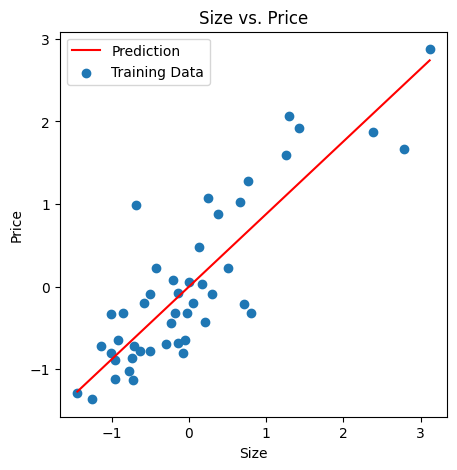

In [45]:
x = np.linspace(df["size"].min(), df["size"].max(), 100)

y_pred = theta_values[0, 0] + (theta_values[0, 1] * x)


# draw the line for Size vs. Price

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, y_pred, 'r', label='Prediction')
ax.scatter(df["size"], df["price"], label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Price')
ax.set_title('Size vs. Price')
plt.savefig("images/size_vs_price.png")


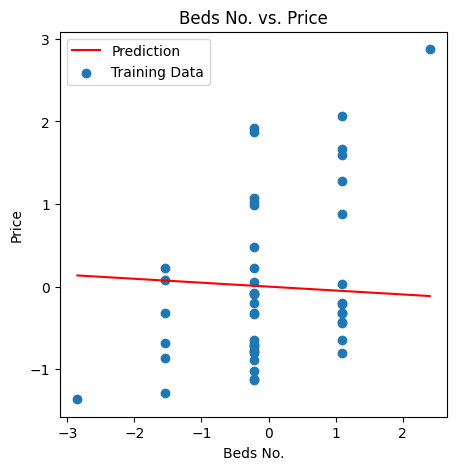

In [46]:
# Create x values using the min and max of the 'Beds No.' column in the DataFrame
x = np.linspace(df['Beds No.'].min(), df['Beds No.'].max(), 100)

# Calculate the predicted y values using the regression parameters
y_pred = theta_values[0, 0] + (theta_values[0, 2] * x)

# Plotting
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, y_pred, 'r', label='Prediction')
ax.scatter(df['Beds No.'], df['price'], label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Beds No.')
ax.set_ylabel('Price')
ax.set_title('Beds No. vs. Price')
plt.savefig("images/beds_vs_price.png")

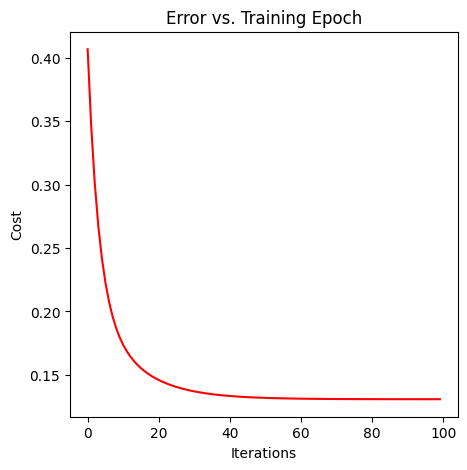

In [47]:
# draw error graph
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.savefig("images/multi_variable_cost_function.png")